TML-08, 
 Abhishek Goyal-Team Lead,
Dheeraj Vishwakarma,
Pratik Vishwakarma

Problem Statement: Build a model to predict whether a stock's closing price will go up or down compared to the previous day based on its opening, high, low, and volume. Metrics: Accuracy, F1-score.

Model used: XGBoost   

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
data = pd.read_csv('tesla.csv')

# Pre-processing

In [3]:
features = ['Open', 'High', 'Low', 'Volume']
Label = 'Label'
data['Label'] = np.where(data['Close'] > data['Close'].shift(+1),1,0)

In [4]:
data = data.head(500)

In [5]:
X = data[features]
y = data['Label']  

In [6]:
data.tail(200)

,Date,Open,High,Low,Close,Adj Close,Volume,Label
300,06-09-2011,22.500000,23.200001,22.290001,22.940001,22.940001,809800,0
301,07-09-2011,23.389999,24.000000,23.280001,23.840000,23.840000,459200,1
302,08-09-2011,23.580000,24.030001,23.280001,23.610001,23.610001,505700,0
303,09-09-2011,23.370001,23.570000,22.549999,22.969999,22.969999,669300,0
304,12-09-2011,22.500000,23.309999,22.450001,22.879999,22.879999,566600,0
...,...,...,...,...,...,...,...,...
495,14-06-2012,30.180000,30.650000,28.620001,29.389999,29.389999,872200,0
496,15-06-2012,29.389999,29.950001,28.809999,29.910000,29.910000,646800,1
497,18-06-2012,29.940001,32.330002,29.500000,31.840000,31.840000,1256800,1
498,19-06-2012,32.020000,32.660000,31.500000,32.090000,32.090000,911100,1


# Spliting the data for training and testing

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing XGB Model

In [8]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.73
F1 Score: 0.70


# Visualizing actual vs predicted labels

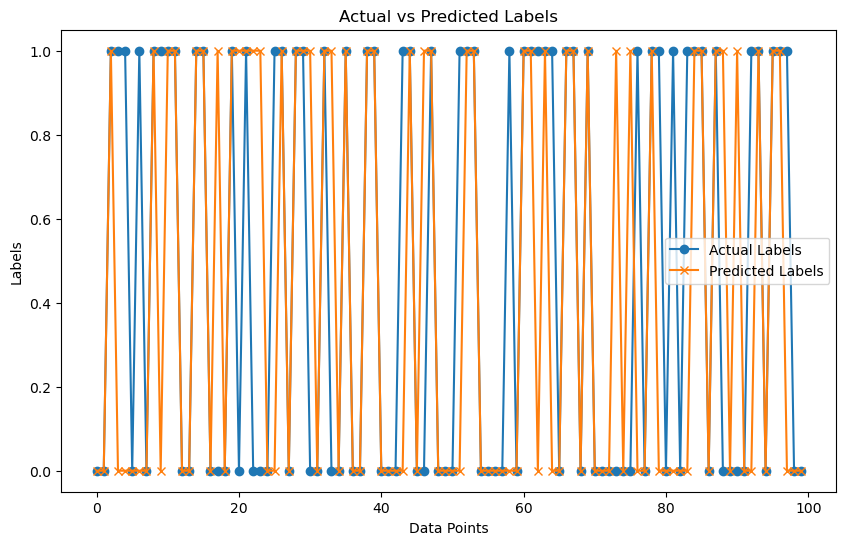

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Labels', marker='o')
plt.plot(y_pred, label='Predicted Labels', marker='x')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Data Points')
plt.ylabel('Labels')
plt.legend()
plt.show()